## 7. 一般化線形混合モデル(GLMM)

In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import polars as pl
import pandas as pd

/home/yoshino/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
data = pd.read_csv('./data/chapter7/data.csv')

print(len(data))
data.head()

100


,N,y,x,id
0,8,0,2,1
1,8,1,2,2
2,8,2,2,3
3,8,4,2,4
4,8,1,2,5


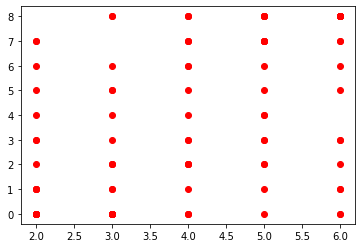

In [11]:
plt.scatter(data['x'].values, data['y'].values, color='red')

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [13]:
x_model_result = smf.glm(formula='y + I(N - y) ~ x', data=data, family=sm.families.Binomial()).fit()
x_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -322.80
Date:                Fri, 20 Jan 2023   Deviance:                       513.84
Time:                        14:39:18   Pearson chi2:                     428.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6078
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1487      0.237     -9.057      0.000      -2.614      -1.684
x              0.5104      0.056      9.179      0.000       0.401       0.619
==============================================================================
"""

In [32]:
# 想定する二項分布の平均: 0.47
# 分散は2くらいと考えられる
print('b1: ', x_model_result.params['Intercept'])
print('b2: ', x_model_result.params['x'])
z = x_model_result.params['Intercept'] + x_model_result.params['x'] * 4
mu = 1 / (1 + np.exp(-z))
print('mu: ', mu)
print('var: ', 8 * mu* (1-mu))

b1:  -2.1487448277410084
b2:  0.5103805508105979
mu:  0.47321999574716733
var:  1.9942626509777461


In [29]:
# 想定していた分散よりもかなり大きい(4倍ほど)
# => 二項分布では説明できないだろう
data4 = data[data['x'] == 4]
print('mean: ', data4['y'].mean())
print('var: ', data4['y'].var())

mean:  4.05
var:  8.365789473684211
